# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [1]:
%pip install tf-nightly --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


First, create some useful functions

In [1]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

Load the `mnist` dataset and normalize in the range [0, 1]

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


In [4]:
print('X_train.shape = ', X_train.shape)
print('Y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('Y_test.shape = ', Y_test.shape)

X_train.shape =  (60000, 28, 28, 1)
Y_train.shape =  (60000, 10)
X_test.shape =  (10000, 28, 28, 1)
Y_test.shape =  (10000, 10)


Create the CNN and show its architecture

In [5]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0     

Define some constants and train de CNN

In [6]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 6s 14ms/step - loss: 0.5631 - accuracy: 0.8224 - val_loss: 0.1808 - val_accuracy: 0.9463
Epoch 2/10
422/422 [==============================] - 6s 15ms/step - loss: 0.1679 - accuracy: 0.9484 - val_loss: 0.1004 - val_accuracy: 0.9678
Epoch 3/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1141 - accuracy: 0.9649 - val_loss: 0.0878 - val_accuracy: 0.9723
Epoch 4/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0893 - accuracy: 0.9728 - val_loss: 0.0764 - val_accuracy: 0.9773
Epoch 5/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0757 - accuracy: 0.9767 - val_loss: 0.0649 - val_accuracy: 0.9827
Epoch 6/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0610 - val_accuracy: 0.9847
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0639 - val_accuracy: 0.9823

Show the performance of the model

Test score: 0.03831328824162483
Test accuracy: 0.9861000180244446


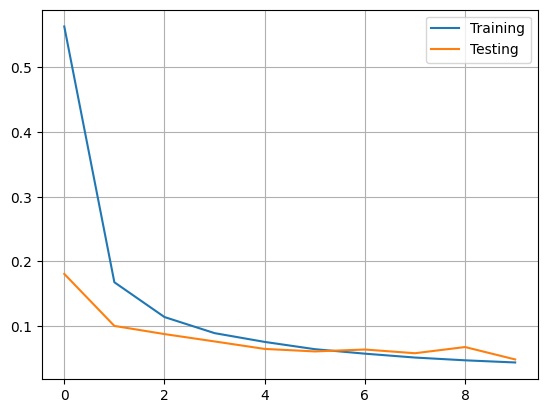

In [7]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [8]:
pred = model.predict(X_test)
print('pred.shape = ', pred.shape)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

313/313 [==============================] - 1s 2ms/step
pred.shape =  (10000, 10)


array([[ 970,    0,    0,    1,    0,    2,    2,    1,    2,    2],
       [   0, 1128,    2,    1,    0,    0,    2,    1,    1,    0],
       [   4,    4, 1010,    4,    4,    0,    1,    2,    3,    0],
       [   0,    0,    0, 1001,    0,    7,    0,    0,    2,    0],
       [   0,    0,    1,    0,  972,    0,    1,    0,    2,    6],
       [   0,    0,    0,    5,    1,  884,    0,    0,    1,    1],
       [   1,    4,    0,    0,    5,    6,  941,    0,    1,    0],
       [   0,    2,   11,    4,    1,    0,    0, 1004,    1,    5],
       [   0,    0,    1,    3,    0,    1,    1,    0,  965,    3],
       [   1,    1,    0,    2,    7,    5,    0,    3,    4,  986]])